In [ ]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from samplers import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

## QNN

#### Sigmoid

In [ ]:
np.random.seed(42)
x = np.random.uniform(-np.pi/2, np.pi/2, (100, 3))
beta = np.array([1,1,1]).reshape(-1,1)

z = x@beta
y = 1/(1+np.exp(-2*z))
y = scaler(y, a=0.1, b=0.9)


plt.plot(z, y, "o")
plt.show()

In [ ]:
np.random.seed(42)
backend = Aer.get_backend('qasm_simulator')

model = sequential_qnn(q_bits = [3],
                     dim = [3, 1],
                     reps = 2,
                     backend=backend,
                     shots=10000,
                     lr = 0.1)

model.train(x, y, epochs=100, verbose=True)

In [ ]:
y_pred = model.predict(x)

In [ ]:
plt.plot(z, y, "o")
plt.plot(z, y_pred, "o")
plt.show()

#### Radial Basis

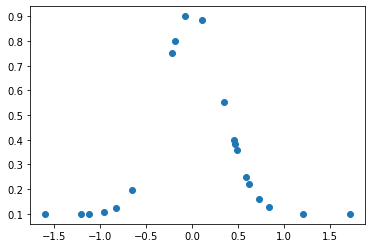

In [2]:
np.random.seed(42)
x = np.random.uniform(-np.pi/2, np.pi/2, (20, 3))
beta = np.array([1/3,-2/3,1/3]).reshape(-1,1)
z = x@beta
y = np.exp(-(z**2)/0.2)
y = scaler(y, a=0.1, b=0.9)

plt.plot(z, y, "o")
plt.show()

In [3]:
np.random.seed(42)
backend = Aer.get_backend('qasm_simulator')

model = sequential_qnn(q_bits = [3],
                     dim = [3, 1],
                     reps = 2,
                     backend=backend,
                     shots=10000,
                     lr = 0.1)

model.train(x, y, epochs=100, verbose=True)

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.1607147507410934
epoch: 1, loss: 0.12045823759239889
epoch: 2, loss: 0.08680031674193717
epoch: 3, loss: 0.0688485827756828
epoch: 4, loss: 0.06408895930353947
epoch: 5, loss: 0.06309435134545262
epoch: 6, loss: 0.06221562783996317
epoch: 7, loss: 0.05920186598046527
epoch: 8, loss: 0.0542332311072103
epoch: 9, loss: 0.049642219306654765
epoch: 10, loss: 0.04491974647361891
epoch: 11, loss: 0.04060686665886858
epoch: 12, loss: 0.03811675497220845
epoch: 13, loss: 0.03611888810681312
epoch: 14, loss: 0.03557465776660814
epoch: 15, loss: 0.03554917726777231
epoch: 16, loss: 0.03624746322887211
epoch: 17, loss: 0.03723781415038138
epoch: 18, loss: 0.037810914110668295
epoch: 19, loss: 0.03850468446394576
epoch: 20, loss: 0.03778317037296152
epoch: 21, loss: 0.036985384719279965
epoch: 22, loss: 0.035441607590199084
epoch: 23, loss: 0.034024679198744745
epoch: 24, loss: 0.03258671622333018
epoch: 25, loss: 0.0321600107242371
epoch: 26, loss: 0.031064066543335555
epoch: 27

In [4]:
y_pred = model.predict(x)

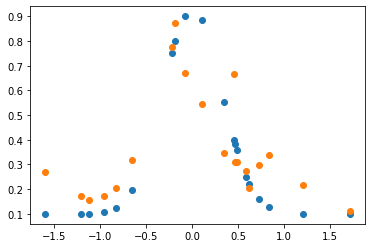

In [5]:
plt.plot(z, y, "o")
plt.plot(z, y_pred, "o")
plt.show()

#### Step Function

In [ ]:
np.random.seed(42)
x = np.random.uniform(-np.pi/2, np.pi/2, (100, 3))
z = np.sum(x, axis=1)
y = np.array(z > 0, dtype=np.float32).reshape(-1,1)
y = scaler(y, a=0.1, b=0.9)

plt.plot(z, y, "o")
plt.show()

In [ ]:
np.random.seed(42)

model3 = sequential_qnn(q_bits = [3],
                     dim = [3, 1],
                     reps = 2,
                     backend=backend,
                     shots=10000,
                     lr = 0.1)

model3.train(x, y, epochs=100, verbose=True)

In [ ]:
y_pred = model3.predict(x)

In [ ]:
plt.plot(z, y, "o")
plt.plot(z, y_pred, "o")
plt.show()